# Cars196

In [1]:
# %load_ext autoreload
# %autoreload 2

In [2]:
import sys
sys.path.append('../')

from dimensionality_reduction import DimRedRecon
from utils import compute_text_features
from IPython.display import display

import torch
import numpy as np
from glob import glob
import pandas as pd
from matplotlib import pyplot as plt
import webcolors
import trimap

plt.style.use(["science"])

OMP: Info #276: omp_set_nested routine deprecated, please use omp_set_max_active_levels instead.


In [3]:
# load image features and labels
image_features = torch.load("../data/cars196/image_features.pt")
df = pd.read_csv("../data/cars196/Cars196.csv")

We only use the test images from the dataset.

In [4]:
cutoff = 8054
image_features = {i: item for i, item in image_features.items() if i > cutoff}
df = df[cutoff:]

In [5]:
image_features = [image_features[i] for i in sorted(image_features.keys())]
image_features = torch.tensor(np.stack(image_features, axis=0))

In [6]:
image_features.shape

torch.Size([8131, 512])

In [42]:
df["color"].unique()

array(['black', 'mixed', 'white', 'yellow', 'silver', 'red', 'other',
       'blue'], dtype=object)

# Experiments

## Car Model

In [8]:
# Scrapes all car model names from the kbb page
car_models = pd.read_html("https://www.kbb.com/car-make-model-list/new/view-all/make/")
all_models = car_models[0]["Make"] + " " + car_models[0][".css-1mzj64w-ContentWrapper{margin:10px 24px 10px 0px;}Model"]
all_models = all_models.dropna().tolist()
all_models = list(set(all_models))

In [9]:
labels = df["class_name"].tolist()
texts = [f"a photo of a {m}" for m in all_models]
text_features = compute_text_features(texts)

In [10]:
text_features.shape

torch.Size([545, 512])

In [11]:
dimred = DimRedRecon(num_components=128)

dimred.fit(text_features)

Loss (1269): 0.11518724262714386: : 1269it [00:16, 77.50it/s]

Finished optimization. Best loss (0.11501942574977875) achieved after 1169 iterations.


In [12]:
transformed_image_features = dimred.transform(image_features)

In [13]:
transformed_image_features.shape

torch.Size([8131, 128])

In [14]:
visualization = trimap.TRIMAP().fit_transform(transformed_image_features.numpy())

In [15]:
def values_to_colors(values):
    colors = []
    mapper = {}
    for v in values:
        if v not in mapper:
            mapper[v] = len(mapper)

        colors.append(mapper[v])
    return colors

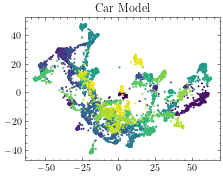

In [16]:
plt.title("Car Model")
plt.scatter(visualization[:, 0], visualization[:, 1], c=values_to_colors(df["class_name"]), s=1)
plt.savefig("embedding_visualizations/car_model.pdf", bbox_inches="tight")
plt.show()

## Car Manufacturer

In [17]:
# Scrapes all car model names from the kbb page
car_models = pd.read_html("https://www.kbb.com/car-make-model-list/new/view-all/make/")
manufacturers = car_models[0]["Make"]
manufacturers = manufacturers.dropna().tolist()
manufacturers = list(set(manufacturers))

In [18]:
len(manufacturers), df["manufacturer"].nunique()

(46, 35)

In [19]:
labels = df["manufacturer"].tolist()
texts = [f"a photo of a car produced by {m}" for m in manufacturers]
text_features = compute_text_features(texts)

In [20]:
text_features.shape

torch.Size([46, 512])

In [21]:
dimred = DimRedRecon(num_components=128)

dimred.fit(text_features)

Loss (246): 0.019724223762750626: : 246it [00:01, 228.60it/s]

Finished optimization. Best loss (0.01666981913149357) achieved after 146 iterations.


In [22]:
transformed_image_features = dimred.transform(image_features)

In [23]:
transformed_image_features.shape

torch.Size([8131, 128])

In [24]:
visualization = trimap.TRIMAP().fit_transform(transformed_image_features.numpy())

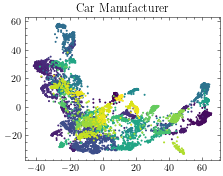

In [25]:
plt.title("Car Manufacturer")
plt.scatter(visualization[:, 0], visualization[:, 1], c=values_to_colors(df["manufacturer"]), s=1)
plt.savefig("embedding_visualizations/car_manufacturer.pdf", bbox_inches="tight")
plt.show()

## Car Type

In [26]:
df["type"].nunique()

7

In [27]:
labels = df["type"].tolist()
texts = [f"a photo of a {m}" for m in labels]
text_features = compute_text_features(texts)

In [28]:
text_features.shape

torch.Size([7, 512])

In [29]:
dimred = DimRedRecon(num_components=128)

dimred.fit(text_features)

Loss (423): 0.009942247532308102: : 423it [00:01, 271.48it/s]

Finished optimization. Best loss (0.008043469861149788) achieved after 323 iterations.


In [30]:
transformed_image_features = dimred.transform(image_features)

In [31]:
transformed_image_features.shape

torch.Size([8131, 128])

In [32]:
visualization = trimap.TRIMAP().fit_transform(transformed_image_features.numpy())

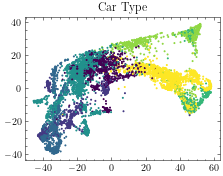

In [33]:
plt.title("Car Type")
plt.scatter(visualization[:, 0], visualization[:, 1], c=values_to_colors(df["type"]), s=1)
plt.savefig("embedding_visualizations/car_type.pdf", bbox_inches="tight")
plt.show()

# Car Color

In [34]:
texts = [f"a photo of a {c} car" for c in webcolors.CSS21_HEX_TO_NAMES.values()]
text_features = compute_text_features(texts)

In [35]:
text_features.shape

torch.Size([17, 512])

In [36]:
dimred = DimRedRecon(num_components=128)

dimred.fit(text_features)

Loss (335): 0.014226097613573074: : 335it [00:01, 178.34it/s]

Finished optimization. Best loss (0.007954736240208149) achieved after 235 iterations.


In [37]:
transformed_image_features = dimred.transform(image_features)

In [38]:
transformed_image_features.shape

torch.Size([8131, 128])

In [39]:
visualization = trimap.TRIMAP().fit_transform(transformed_image_features.numpy())

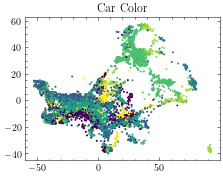

In [40]:
plt.title("Car Color")
plt.scatter(visualization[:, 0], visualization[:, 1], c=values_to_colors(df["color"]), s=1)
plt.savefig("embedding_visualizations/car_color.pdf", bbox_inches="tight")
plt.show()